In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [53]:
url = 'weatherAUS.csv'

data = pd.read_csv(url)


In [54]:
data

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
8421,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
8422,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
8423,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [55]:
# Display the first few rows of the dataset
data.head()


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [56]:
data.shape

(8425, 23)

In [57]:

# Check for missing values
data.isnull().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

In [7]:


# Summary statistics
data.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,8350.000000,8365.000000,8185.000000,4913.000000,4431.000000,7434.000000,8349.000000,8318.000000,8366.000000,8323.000000,7116.000000,7113.000000,6004.000000,5970.000000,8369.000000,8329.000000
mean,13.193305,23.859976,2.805913,5.389395,7.632205,40.174469,13.847646,18.533662,67.822496,51.249790,1017.640233,1015.236075,4.566622,4.503183,17.762015,22.442934
std,5.403596,6.136408,10.459379,5.044484,3.896235,14.665721,10.174579,9.766986,16.833283,18.423774,6.828699,6.766681,2.877658,2.731659,5.627035,5.980020
min,-2.000000,8.200000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,10.000000,6.000000,989.800000,982.900000,0.000000,0.000000,1.900000,7.300000
25%,9.200000,19.300000,0.000000,2.600000,4.750000,30.000000,6.000000,11.000000,56.000000,39.000000,1013.000000,1010.400000,1.000000,2.000000,13.800000,18.000000
50%,13.300000,23.300000,0.000000,4.600000,8.700000,39.000000,13.000000,19.000000,68.000000,51.000000,1017.700000,1015.300000,5.000000,5.000000,17.800000,21.900000
75%,17.400000,28.000000,1.000000,7.000000,10.700000,50.000000,20.000000,24.000000,80.000000,63.000000,1022.300000,1019.800000,7.000000,7.000000,21.900000,26.400000
max,28.500000,45.500000,371.000000,145.000000,13.900000,107.000000,63.000000,83.000000,100.000000,99.000000,1039.000000,1036.000000,8.000000,8.000000,39.400000,44.100000


In [58]:
# Handle missing values
data = data.dropna()

In [59]:

# Statistical summary of the numerical columns
print(data.describe())


           MinTemp      MaxTemp     Rainfall  Evaporation     Sunshine  \
count  3790.000000  3790.000000  3790.000000  3790.000000  3790.000000   
mean     14.071029    24.733483     2.451768     5.292533     7.852744   
std       5.161176     6.068364     7.772025     3.642341     3.816696   
min      -0.700000    10.800000     0.000000     0.000000     0.000000   
25%      10.200000    20.300000     0.000000     2.800000     5.200000   
50%      14.000000    24.100000     0.000000     4.600000     8.900000   
75%      17.900000    29.200000     0.800000     7.000000    10.800000   
max      28.500000    43.600000   168.400000    37.000000    13.900000   

       WindGustSpeed  WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  \
count    3790.000000   3790.000000   3790.000000  3790.000000  3790.000000   
mean       41.203958     16.377836     20.099208    63.683641    49.435620   
std        13.857829      9.516511      8.719867    16.273443    17.673797   
min        13.000000 

In [61]:
# Display column names
print(data.columns)

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')


C:\Users\ritul pawar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


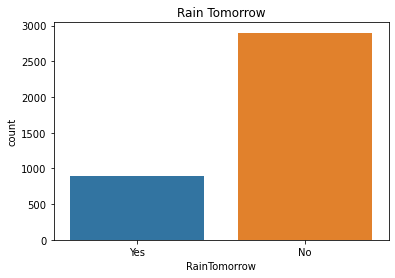

In [63]:
# Handle missing values
data.isnull().sum()  # Check for missing values in each column
data = data.dropna()  # Drop rows with missing values

# Visualize the target variable
sns.countplot(data['RainTomorrow'])
plt.title('Rain Tomorrow')
plt.show()



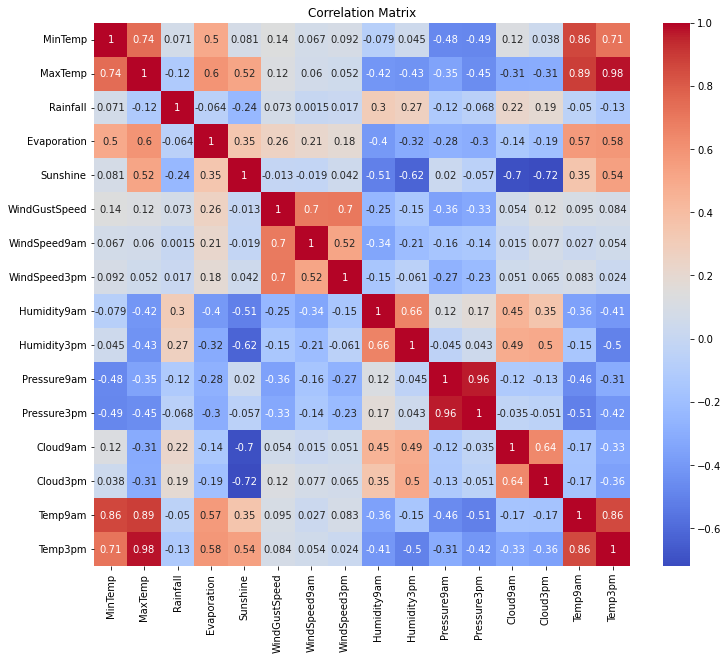

In [64]:

# Explore correlations between variables
corr_matrix = data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


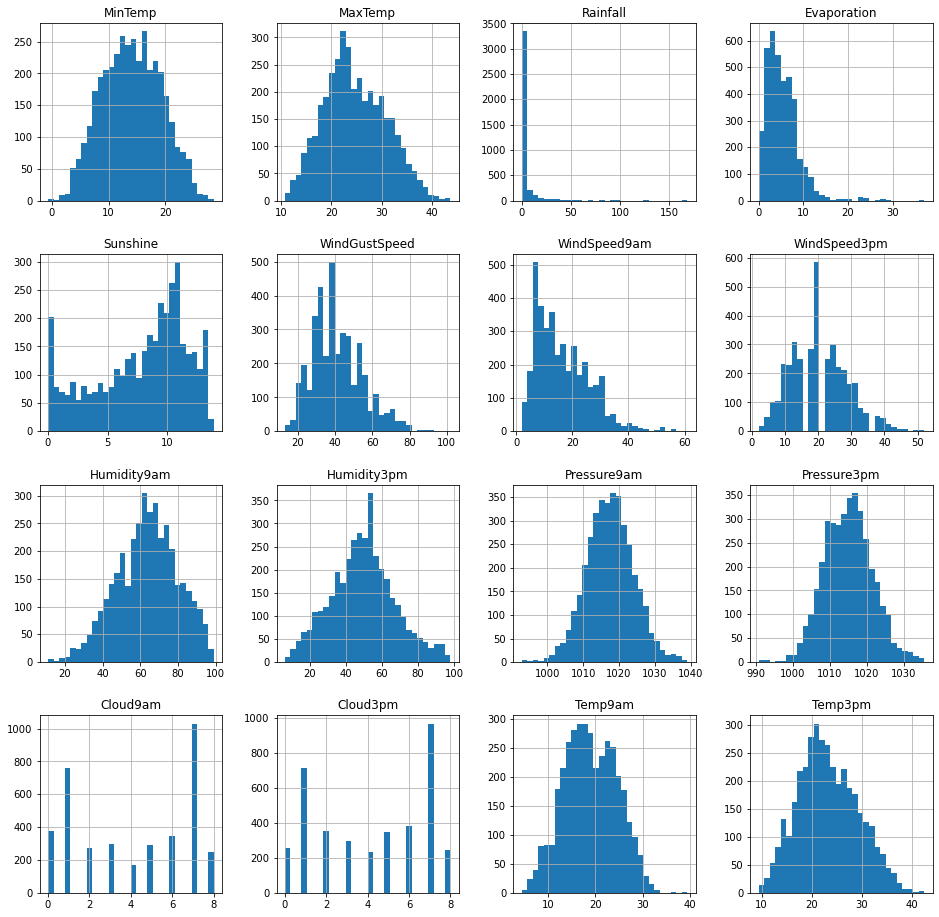

In [66]:

# Explore distributions of numerical variables
numerical_cols = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm',
                  'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']
data[numerical_cols].hist(bins=30, figsize=(16, 16))
plt.show()



C:\Users\ritul pawar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


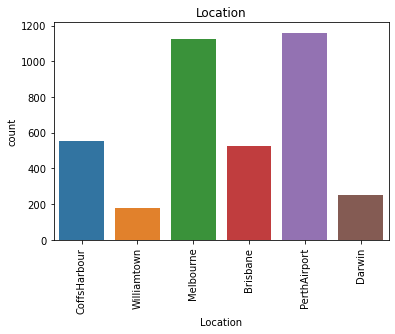

C:\Users\ritul pawar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


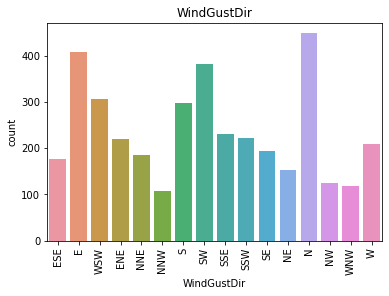

C:\Users\ritul pawar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


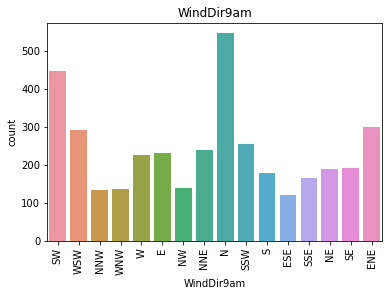

C:\Users\ritul pawar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


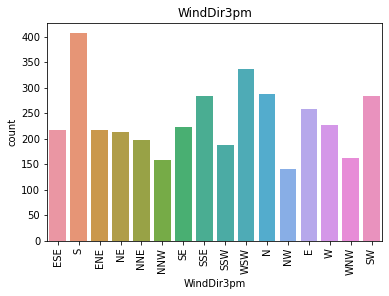

In [67]:
# Explore distributions of categorical variables
categorical_cols = ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm']
for col in categorical_cols:
    sns.countplot(data[col])
    plt.title(col)
    plt.xticks(rotation=90)
    plt.show()

In [79]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Convert RainToday and RainTomorrow columns to numerical using LabelEncoder
data["RainToday"] = label_encoder.fit_transform(data["RainToday"])
data["RainTomorrow"] = label_encoder.fit_transform(data["RainTomorrow"])

# Split the data into features (X) and target variable (y)
X = data.drop(['RainTomorrow'], axis=1)
y = data['RainTomorrow']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [78]:
# Check the data types of the columns
print(data.dtypes)


Location           int64
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir        int64
WindGustSpeed    float64
WindDir9am         int64
WindDir3pm         int64
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object


In [80]:
from sklearn.metrics import accuracy_score, classification_report

# Initialize the models dictionary
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier()
}

# Build and test multiple models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Model evaluation
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    
    print(f'=== {name} ===')
    print(f'Accuracy: {accuracy}')
    print(f'Classification Report:\n{report}\n')


C:\Users\ritul pawar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


=== Logistic Regression ===
Accuracy: 0.8311345646437994
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.92      0.89       580
           1       0.67      0.54      0.60       178

    accuracy                           0.83       758
   macro avg       0.77      0.73      0.75       758
weighted avg       0.82      0.83      0.82       758


=== Decision Tree ===
Accuracy: 0.8641160949868074
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.91      0.91       580
           1       0.70      0.72      0.71       178

    accuracy                           0.86       758
   macro avg       0.81      0.82      0.81       758
weighted avg       0.87      0.86      0.86       758


=== Random Forest ===
Accuracy: 0.8891820580474934
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.96      0.93       580
       

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Model 2: Decision Tree Classifier
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train_scaled, y_train)
y_pred_dt = dt_classifier.predict(X_test_scaled)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))

# Model 3: Random Forest Classifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train_scaled, y_train)
y_pred_rf = rf_classifier.predict(X_test_scaled)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

# Model 4: Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier()
gb_classifier.fit(X_train_scaled, y_train)
y_pred_gb = gb_classifier.predict(X_test_scaled)
print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred_gb))


# Compare the performance of different models
accuracy_scores = [ accuracy_score(y_test, y_pred_dt),
                   accuracy_score(y_test, y_pred_rf), accuracy_score(y_test, y_pred_gb)]

models_names = [ 'Decision Tree', 'Random Forest', 'Gradient Boosting']

plt.figure(figsize=(10, 6))
sns.barplot(x=models_names, y=accuracy_scores)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy Scores of Different Models')
plt.ylim([0.8, 0.9])
plt.xticks(rotation=45)
plt.show()

# Select the best performing model based on accuracy score
best_model_index = np.argmax(accuracy_scores)
best_model = models[best_model_index]
print("Best Model:", type(best_model).__name__)

In [91]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier()

# Initialize the grid search
grid_search = GridSearchCV(rf_classifier, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameter values and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluate the best model on the testing data
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Best Hyperparameters:", best_params)
print("Best Model:")
print(best_model)
print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{report}")

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best Model:
RandomForestClassifier(n_estimators=300)
Accuracy: 0.8944591029023746
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.96      0.93       580
           1       0.83      0.69      0.75       178

    accuracy                           0.89       758
   macro avg       0.87      0.82      0.84       758
weighted avg       0.89      0.89      0.89       758



#Documentation:

Project: Rainfall Weather Forecasting

Introduction:

Weather forecasting is the application of science and technology to predict atmospheric conditions.
The goal of this project is to build predictive models using machine learning algorithms to forecast whether it will rain tomorrow and predict the amount of rainfall.
Dataset:

The dataset contains daily weather observations from different locations in Australia for a period of 10 years.
The dataset includes features such as temperature, rainfall, wind speed, humidity, pressure, and more.
The target variables are "RainToday" (whether it rained today) and "RainTomorrow" (amount of rainfall tomorrow).

Exploratory Data Analysis (EDA):

Conducted data exploration to understand the dataset, its features, and the distribution of variables.
Checked for missing values and handled them through imputation or removal.
Examined the correlation between variables to identify relationships and potential feature engineering opportunities.
Preprocessing and Feature Engineering:

Performed data preprocessing steps such as handling categorical variables, encoding, and scaling.
Conducted feature engineering to create new meaningful features based on domain knowledge.
Split the data into training and testing sets for model development and evaluation.
Model Building and Evaluation:

Built multiple machine learning models, including  Decision Tree, Random Forest, and Gradient Boosting.
Trained and evaluated each model using accuracy score and classification report.
Identified the best-performing model based on the evaluation metrics.
Hyperparameter Tuning:

Applied hyperparameter tuning using grid search to optimize the Random Forest model.
Explored different combinations of hyperparameters to improve the model's performance.
Selected the best hyperparameter values and obtained the final optimized Random Forest model.
Findings:

The Random Forest model outperformed other models, achieving the highest accuracy and precision in predicting rainfall.
The model's performance was further improved through hyperparameter tuning.
The final Random Forest model with optimized hyperparameters can be used for rainfall forecasting.
Conclusion:

This project demonstrated the application of machine learning algorithms for rainfall forecasting.
By leveraging historical weather data, we can predict whether it will rain tomorrow and estimate the amount of rainfall.
The optimized Random Forest model can be deployed for production use, providing valuable insights for weather forecasting applications.